In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
from fpdf import FPDF
from text import getBericht1
from grafiken import create_line_chart



Der Berner Index der Wohnungsmietpreise erreicht im November 2022 einen Stand von 124.0 Punkten (Basis: 2003 = 100), was einer Zunahme um 1.0% gegenüber dem Vorjahr entspricht. Die Preisentwicklung der ['2 Zimmer', '3 Zimmer']-Wohungen lag über dem Gesamtindex. Bei den ['1 Zimmer', '4 Zimmer', '5 Zimmer']-Wohungen lag sie darunter.


In [2]:
def add_text(text_class,text,page_number=""):
    if text_class == "title":
        pdf.set_font("UniversLTStd-Light", size=16)
        pdf.set_left_margin(61.6)
        pdf.multi_cell(125,8, text, align='L')

    if text_class == "header":
        pdf.set_font("UniversLTStd-Light", size=8.5)
        pdf.cell(0, 5, "Wohnungsmietpreiserhebung in der Stadt Bern im November 2022", ln=True, align='R',border="B")


    if text_class == "footer":
        pdf.set_font("UniversLTStd-Light", size=8.5)
        pdf.set_left_margin(19)
        pdf.cell(0, 1, "Statistik Stadt Bern", ln=True, align='L')

        pdf.set_font("UniversLTStd-Light", size=12)
        pdf.set_x(0)
        pdf.set_right_margin(18)
        pdf.image("Element 1.png", x=177.65, y=285.8)
        pdf.cell(0, 1, page_number, ln=True, align='R')


    if text_class == "subtitle":
        pdf.set_font("UniversLTStd-Light", size=14.5)
        pdf.set_left_margin(61.6)
        pdf.multi_cell(125,8, text, align='L')

    if text_class == "text":
        pdf.set_font("UniversLTStd-Light", size=11)
        pdf.set_left_margin(61.6)
        pdf.set_text_color(0,0,0)
        pdf.multi_cell(131.8,4.5, text, align='J')

    if text_class == "info":
        pdf.set_font("UniversLTStd-LightObl", size=9)
        pdf.set_x(2)
        pdf.set_left_margin(18)
        pdf.ln(-27)
        pdf.set_text_color(223,66,56)
        pdf.multi_cell(40,4.5, text, align='L')




def add_reference(text_class,text,reference_title="",reference_origin=""):
    if text_class == "reference":
        pdf.set_font("UniversLTStd-Light", size=11)
        pdf.set_text_color(0,0,0)
        pdf.set_x(0)
        pdf.set_left_margin(80)
        pdf.multi_cell(120,4.5, text, align='L')
        pdf.set_font("UniversLTStd-Light", size=9)
        pdf.multi_cell(120,4.5, reference_origin, align='L')

        pdf.set_font("UniversLTStd-Light", size=11)
        pdf.set_x(0)
        pdf.set_left_margin(61.6)
        pdf.ln(-14)
        pdf.multi_cell(40,4.5, reference_title, align='L')

def add_image(image):
    pdf.set_x(0)
    pdf.set_left_margin(45.6)
    pdf.image(image)

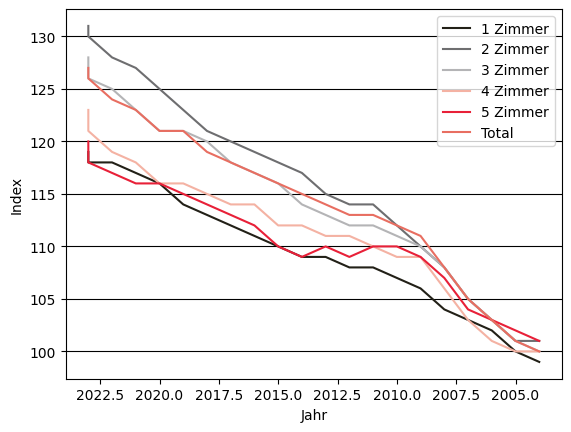

In [3]:
# Create a PDF report with text, graph, and table
pdf = FPDF('P', 'mm', 'A4')
pdf.add_font('UniversLTStd-Light','', 'UniversLTStd-Light.ttf', uni=True)
pdf.add_font('UniversLTStd-Bold','', 'UniversLTStd-Bold.ttf', uni=True)
pdf.add_font('UniversLTStd-LightObl','', 'UniversLTStd-LightObl.ttf', uni=True)

left_margin = 19
right_margin = 18
top_margin = 6.35
pdf.set_margins(left_margin, top_margin, right_margin)
pdf.set_auto_page_break(True,5)
pdf.add_page()
pdf.set_font("Arial", size=12)

#header-test
add_text("header","Wohnungsmietpreiserhebung in der Stadt Bern im November 2022")

# Right-aligned header
pdf.ln(272)


add_text("footer","Statistik Stadt Bern","3")
pdf.ln(-255)

# Add text
add_text("title","Wohnungsmietpreiserhebung in der Stadt Bern im November 2022")
pdf.ln(4.5)

add_text("subtitle","Berner Index der Wohnungsmietpreise")

pdf.ln(4.5)
add_text("text",getBericht1())


add_text("info","Anstieg innert Jahresfrist um 1,1%")

pdf.ln(21)

add_reference("reference","Berner Index der Wohnungsmietpreise nach Wohnungsgrösse November 2018 bis 2022","Tabelle 1:","(Basis: November 2003 = 100)")


create_line_chart()
add_image("./diagrams/linien_diagramm.png")
pdf.ln(10)
#pdf.image("./table.png")
# Add the graph
#pdf.cell(0, 10, "Switzerland Inflation (2000-2023)", ln=True, align='C')
#pdf.image("inflation_graph.png", x=25, y=pdf.get_y(), w=160)
#pdf.ln(80)

# Add the table
#pdf.cell(0, 10, "Switzerland vs Austria Inflation (2019-2023)", ln=True, align='C')


In [4]:
pdf.add_page()
pdf.set_x(0)
pdf.set_y(0)
pdf.image(Deckblatt.png)

NameError: name 'Deckblatt' is not defined

In [ ]:
pdf.output("inflation_report.pdf", 'F')